[youtube](https://youtu.be/pVYATzSoZVA)
[github](https://github.com/SungchulLee/financial_math/tree/master/how%20to%20get%20yahoo%20financial%20data)
[ppt](https://github.com/SungchulLee/financial_math/blob/master/%E1%84%8B%E1%85%A3%E1%84%92%E1%85%AE%20%E1%84%91%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%82%E1%85%A2%E1%86%AB%E1%84%89%E1%85%B3%20%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%20%E1%84%92%E1%85%AC%E1%86%A8%E1%84%83%E1%85%B3%E1%86%A8%E1%84%92%E1%85%A1%E1%84%80%E1%85%B5.pptx)

In [1]:
import pandas as pd
df = pd.read_csv('data/fxcm_eur_usd_tick_data.csv',
                 index_col=0, 
                 parse_dates=True)
print(df.head())

                             Bid      Ask
2017-11-10 12:00:00.007  1.16395  1.16394
2017-11-10 12:00:00.053  1.16394  1.16394
2017-11-10 12:00:00.740  1.16394  1.16393
2017-11-10 12:00:00.746  1.16394  1.16391
2017-11-10 12:00:00.756  1.16394  1.16392


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17352 entries, 2017-11-10 12:00:00.007000 to 2017-11-10 14:00:00.131000
Data columns (total 2 columns):
Bid    17352 non-null float64
Ask    17352 non-null float64
dtypes: float64(2)
memory usage: 406.7 KB
None


In [3]:
df['Mid'] = df.mean(axis=1)
print(df.head())

                             Bid      Ask       Mid
2017-11-10 12:00:00.007  1.16395  1.16394  1.163945
2017-11-10 12:00:00.053  1.16394  1.16394  1.163940
2017-11-10 12:00:00.740  1.16394  1.16393  1.163935
2017-11-10 12:00:00.746  1.16394  1.16391  1.163925
2017-11-10 12:00:00.756  1.16394  1.16392  1.163930


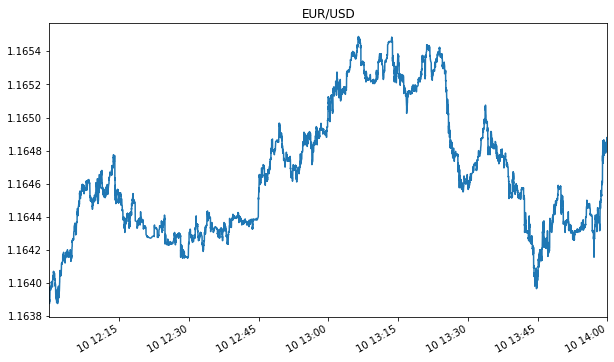

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df['Mid'].plot(figsize=(10, 6))
plt.title('EUR/USD')
plt.show()

In [5]:
df_ = df.resample(rule='1min').mean()
#df_ = df.resample(rule='1min').last()
print(df_.head())

                          Bid       Ask       Mid
2017-11-10 12:00:00  1.163969  1.163970  1.163970
2017-11-10 12:01:00  1.163937  1.163941  1.163939
2017-11-10 12:02:00  1.164051  1.164059  1.164055
2017-11-10 12:03:00  1.164154  1.164162  1.164158
2017-11-10 12:04:00  1.164168  1.164176  1.164172


In [11]:
#df_ = df.resample(rule='1min').mean()
df_ = df.resample(rule='1min').last()
print(df_.head())

                         Bid      Ask       Mid
2017-11-10 12:00:00  1.16406  1.16407  1.164065
2017-11-10 12:01:00  1.16396  1.16397  1.163965
2017-11-10 12:02:00  1.16416  1.16418  1.164170
2017-11-10 12:03:00  1.16417  1.16417  1.164170
2017-11-10 12:04:00  1.16425  1.16427  1.164260


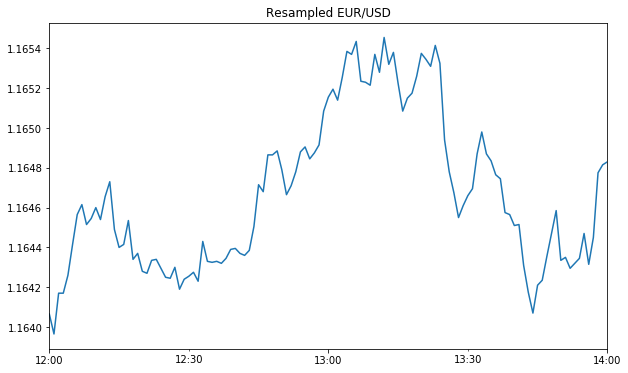

In [12]:
df_['Mid'].plot(figsize=(10, 6))
plt.title('Resampled EUR/USD')
plt.show()

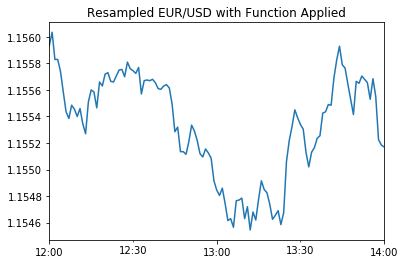

In [13]:
def reversal(x): return 2*1.16-x
df_['Mid'].apply(reversal).plot()
plt.title('Resampled EUR/USD with Function Applied')
plt.show()

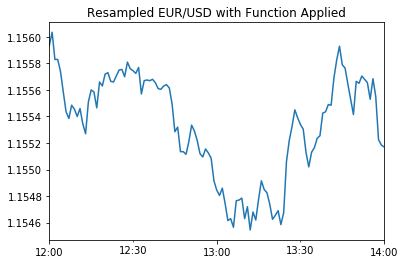

In [14]:
df_['Mid'].apply(lambda x: 2*1.16-x).plot()
plt.title('Resampled EUR/USD with Function Applied')
plt.show()